# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
import os
import csv
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import API key
import api_keys as weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".WeatherPy/cities.csv"



## Generate Cities List

In [12]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# OpenWeatherMap API Key
weather_api_key = api_keys.weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Looking for next city...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Riverton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=riverton
Processing Record 2 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=busselton
Processing Record 3 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=cape town
Processing Record 4 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=sioux lookout
Processing Record 5 | Abhā
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=abha
City not found. Looking for next city...
Processing Record 6 | Deep River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=deep river
Processing Record 7 | Albany
http:

Processing Record 56 | Santarém
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=santarem
City not found. Looking for next city...
Processing Record 57 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=sinnamary
Processing Record 58 | Fes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=fez
Processing Record 59 | Balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=balabac
Processing Record 60 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=castro
Processing Record 61 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=huarmey
Processing Record 62 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c56

Processing Record 112 | Örnsköldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=ornskoldsvik
Processing Record 113 | Dobryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=dobryanka
Processing Record 114 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=port blair
Processing Record 115 | Churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=churapcha
Processing Record 116 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=launceston
Processing Record 117 | Lakatoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=lakatoro
Processing Record 118 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7

Processing Record 167 | Ensenada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=ensenada
Processing Record 168 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=lata
Processing Record 169 | Bowling Green
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=bowling green
Processing Record 170 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=grindavik
Processing Record 171 | Kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=kenai
City not found. Looking for next city...
City not found. Looking for next city...
Processing Record 172 | Klimovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=klimovo
Processing Record 173 | Rancho Palos Verdes
http://a

Processing Record 222 | Nanyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=nanyang
Processing Record 223 | Vung Tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=vung tau
City not found. Looking for next city...
Processing Record 224 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=kieta
Processing Record 225 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=vila franca do campo
Processing Record 226 | Grindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=grindu
City not found. Looking for next city...
Processing Record 227 | Tuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=tuban
Processing Record 228 | Ucluelet
http://ap

Processing Record 276 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=baykit
Processing Record 277 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=los llanos de aridane
Processing Record 278 | Payo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=payo
Processing Record 279 | São Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=sao filipe
Processing Record 280 | Agüimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=aguimes
Processing Record 281 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=alice springs
Processing Record 282 | Natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7c

Processing Record 332 | Manacapuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=manacapuru
Processing Record 333 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=xining
Processing Record 334 | Nakamura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=nakamura
Processing Record 335 | Nivala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=nivala
Processing Record 336 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=baruun-urt
Processing Record 337 | Catabola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=catabola
Processing Record 338 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a6

Processing Record 388 | Tuscaloosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=tuscaloosa
Processing Record 389 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=abu dhabi
Processing Record 390 | Fuyu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=fuyu
City not found. Looking for next city...
City not found. Looking for next city...
Processing Record 391 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=vestmannaeyjar
Processing Record 392 | Khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=khandyga
City not found. Looking for next city...
Processing Record 393 | Cassilândia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=cas

Processing Record 443 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=nanortalik
Processing Record 444 | Arrondissement de Calais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=calais
Processing Record 445 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=pitimbu
Processing Record 446 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=vao
Processing Record 447 | Novo Aripuanã
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=novo aripuana
Processing Record 448 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=yar-sale
Processing Record 449 | Assiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a8

Processing Record 499 | Ostroh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=ostroh
Processing Record 500 | Gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=gao
Processing Record 501 | Huntersville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=huntersville
Processing Record 502 | Srostki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=srostki
Processing Record 503 | Singapore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=singapore
Processing Record 504 | Kinablangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=kinablangan
Processing Record 505 | Narón
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61

Processing Record 554 | Beruwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=beruwala
Processing Record 555 | Champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cba7cb78c568a83670de1a1e1d46a61&q=champerico


In [19]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

# Display data frame head 
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Riverton,1,US,1588796843,27,40.52,-111.94,77.00,21.92
1,Busselton,77,AU,1588796948,70,-33.65,115.33,51.01,9.53
2,Cape Town,82,ZA,1588796799,88,-33.93,18.42,63.00,8.05
3,Sioux Lookout,20,CA,1588796951,28,50.10,-91.92,46.40,16.11
4,Abhā,100,SA,1588796952,82,18.22,42.51,64.40,5.82
5,Deep River,20,CA,1588796953,20,46.10,-77.50,57.99,8.05
6,Albany,100,US,1588796954,36,42.60,-73.97,57.00,4.05
7,Mahalapye,0,BW,1588796955,35,-23.10,26.81,64.72,2.35
8,Carnarvon,0,AU,1588796956,68,-24.87,113.63,61.32,21.65
9,Thunder Bay,75,CA,1588796756,37,48.40,-89.32,53.60,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

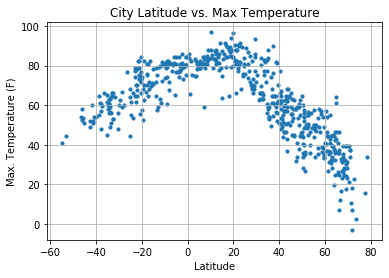

In [21]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('Max_Temp_vs_Latitude.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

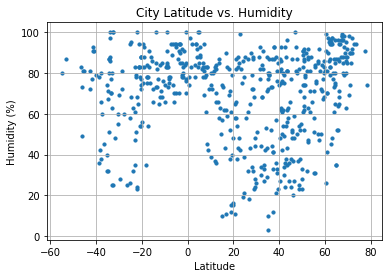

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

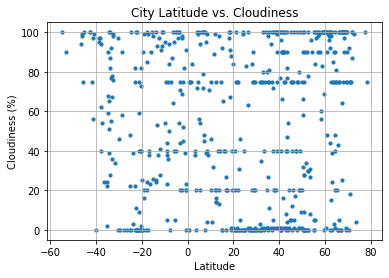

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

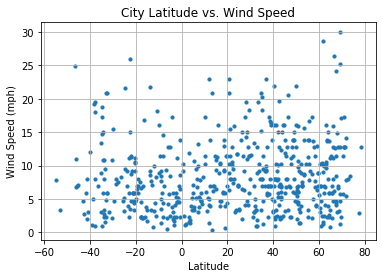

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
northern_df = weather_data[weather_data['Lat'] >= 0]
northern_df.reset_index(drop=True).head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Riverton,1,US,1588796843,27,40.52,-111.94,77.00,21.92
1,Sioux Lookout,20,CA,1588796951,28,50.10,-91.92,46.40,16.11
2,Abhā,100,SA,1588796952,82,18.22,42.51,64.40,5.82
3,Deep River,20,CA,1588796953,20,46.10,-77.50,57.99,8.05
4,Albany,100,US,1588796954,36,42.60,-73.97,57.00,4.05
5,Thunder Bay,75,CA,1588796756,37,48.40,-89.32,53.60,12.75
6,Nikolskoye,69,RU,1588796961,68,59.70,30.79,48.99,8.95
7,Raudeberg,92,NO,1588796962,83,61.99,5.14,43.00,10.02
8,Chifeng,100,CN,1588796963,34,42.27,118.96,59.74,5.23
9,Chokurdakh,92,RU,1588796967,98,70.63,147.92,21.15,5.70


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
southern_df = weather_data[weather_data['Lat'] < 0]
southern_df.reset_index(drop=True).head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,77,AU,1588796948,70,-33.65,115.33,51.01,9.53
1,Cape Town,82,ZA,1588796799,88,-33.93,18.42,63.00,8.05
2,Mahalapye,0,BW,1588796955,35,-23.10,26.81,64.72,2.35
3,Carnarvon,0,AU,1588796956,68,-24.87,113.63,61.32,21.65
4,Hobart,100,AU,1588796702,81,-42.88,147.33,51.80,4.70
5,Kavieng,98,PG,1588796960,78,-2.57,150.80,81.37,5.35
6,Arraial do Cabo,22,BR,1588796760,83,-22.97,-42.03,78.80,5.82
7,Atuona,54,PF,1588796965,74,-9.80,-139.03,81.18,16.06
8,Mataura,99,NZ,1588796968,73,-46.19,168.86,52.68,6.82
9,Port Elizabeth,87,ZA,1588796970,100,-33.92,25.57,59.00,2.24


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [34]:
# Linear Regression from sklearn
linr = LinearRegression()

# Hemispheres
northern = northern_df
southern = southern_df

# Define regression plot pair function
def regression_plots(hem1, hem2, pred_val, crit_val):

    X1 = hem1[pred_val].to_frame().reset_index(drop=True)
    y1 = hem1[crit_val].to_frame().reset_index(drop=True)
    linr.fit(X1, y1) # Regression for hemisphere 1 (Northern Hemisphere)
    
    X2 = hem2[pred_val].to_frame().reset_index(drop=True)
    y2 = hem2[crit_val].to_frame().reset_index(drop=True)
    linr.fit(X2, y2) # Regression for hemisphere 2 (Southern Hemisphere)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) # Create subplots
    
    # Plot Northern Hemisphere regression (hem1)
    ax1.scatter(X1, y1)
    ax1.plot(X1, linr.predict(X1), color='r')
    ax1.set_ylabel(crit_val)
    ax1.set_xlabel(pred_val)
    ax1.set_title('Northern Hemisphere', fontsize=14)
    
    # Plot Southern Hemisphere regression (hem2)
    ax2.scatter(X2, y2)
    ax2.plot(X2, linr.predict(X2), color='r')
    ax2.set_ylabel(crit_val)
    ax2.set_xlabel(pred_val)
    ax2.set_title('Southern Hemisphere', fontsize=14)
    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

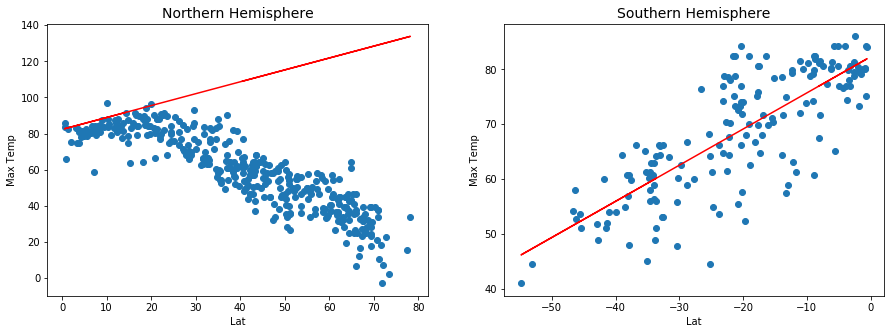

In [35]:
# Temperature (F) vs. Latitude Regression
regression_plots(northern, southern, 'Lat', 'Max Temp')

# Save regression plots image
plt.savefig('Temp_v_Lat_r.png')

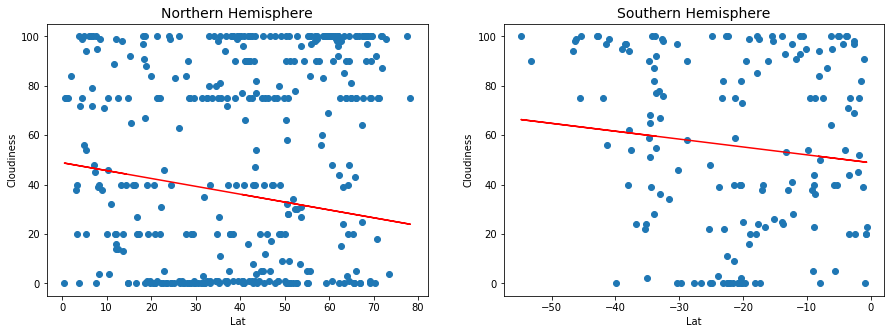

In [37]:
# Cloudiness (%) vs. Latitude Regression
regression_plots(northern, southern, 'Lat', 'Cloudiness')

# Save regression plots image
plt.savefig('Cloud_v_Lat_r.png')

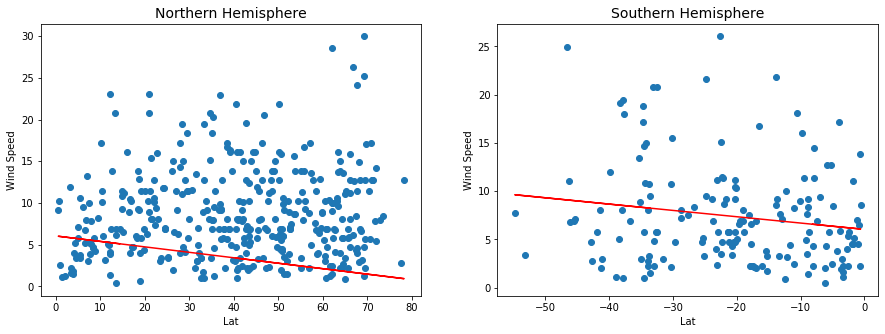

In [36]:
# Wind Speed (mph) vs. Latitude Regression
regression_plots(northern, southern, 'Lat', 'Wind Speed')

# Save regression plots image
plt.savefig('Wind_v_Lat_r.png')